<a href="https://colab.research.google.com/github/junyang-chin/DSUB-5.0/blob/Day-8/Day_8_EDA_on_Food_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explorartory Data Analysis on Food Prices
Sources

> [Link to Kaggle](https://www.kaggle.com/datasets/kannanaikkal/food-demand-forecasting)

## Importing the datasets into dataframes

We use the _pandas_ and _seaborn_ packages

In [6]:
import pandas as pd
import seaborn as sns

### Using the Kaggle API to download the dataset into a zip file

In [7]:
# Print working directory
!pwd

/content


In [8]:
# Set kaggle download directory
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [9]:
# calling the API
!kaggle datasets download kannanaikkal/food-demand-forecasting

  0% 0.00/5.80M [00:00<?, ?B/s]
100% 5.80M/5.80M [00:00<00:00, 216MB/s]


In [10]:
#Open the zipfile
from zipfile import ZipFile
zf = ZipFile("/content/food-demand-forecasting.zip")
zf.namelist()

['fulfilment_center_info.csv',
 'meal_info.csv',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

### Exploring the dataframes
Load the csv into dataframes
df1 = meal_info.csv
df2 = test.csv

In [11]:
df1 = pd.read_csv(zf.open("meal_info.csv"))
df2 = pd.read_csv(zf.open("test.csv"))
pd.set_option('display.max_columns', None)

Showing some randomly picked rows

In [12]:
df1.sample(10)

,meal_id,category,cuisine
35,1727,Rice Bowl,Indian
34,1216,Pasta,Italian
19,2704,Other Snacks,Thai
46,2956,Fish,Continental
44,1962,Pizza,Continental
16,1109,Rice Bowl,Indian
3,1248,Beverages,Indian
7,1778,Beverages,Italian
8,1803,Extras,Thai
38,2304,Desert,Indian


In [13]:
df2.sample(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
28222,1069511,154,145,2640,321.13,321.13,0,0
18465,1145683,151,145,2539,140.65,142.65,0,0
28913,1357176,154,80,1847,196.00,196.00,0,0
1052,1150467,146,34,2569,285.24,285.24,0,0
12492,1055391,149,58,1062,169.78,169.78,0,0
21819,1493329,152,67,2631,97.03,161.02,0,0
3008,1047465,146,132,1962,563.60,547.08,0,1
312,1089046,146,109,2490,290.03,292.03,0,0
1150,1346922,146,126,1571,640.23,640.23,0,0
25385,1138081,153,59,1571,582.03,582.03,0,0


Left join the "test" and "meal_info" on "meal_id"

In [14]:
df3 = pd.merge(df1,df2, on = "meal_id" , how = "left")

Finding unique cuisines


In [15]:
df3["cuisine"].unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

Describing the dataframe

In [16]:
df3.describe()

,meal_id,id,week,center_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
count,32573.000000,3.257300e+04,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000
mean,2032.067909,1.248476e+06,150.477819,81.901728,341.854440,356.493615,0.066435,0.081356
std,547.199004,1.441580e+05,2.864072,45.950455,153.893886,155.150101,0.249045,0.273385
min,1062.000000,1.000085e+06,146.000000,10.000000,67.900000,89.240000,0.000000,0.000000
25%,1558.000000,1.123969e+06,148.000000,43.000000,214.430000,243.500000,0.000000,0.000000
50%,1993.000000,1.247296e+06,150.000000,76.000000,320.130000,321.130000,0.000000,0.000000
75%,2569.000000,1.372971e+06,153.000000,110.000000,446.230000,455.930000,0.000000,0.000000
max,2956.000000,1.499996e+06,155.000000,186.000000,1113.620000,1112.620000,1.000000,1.000000


### Visualising the data

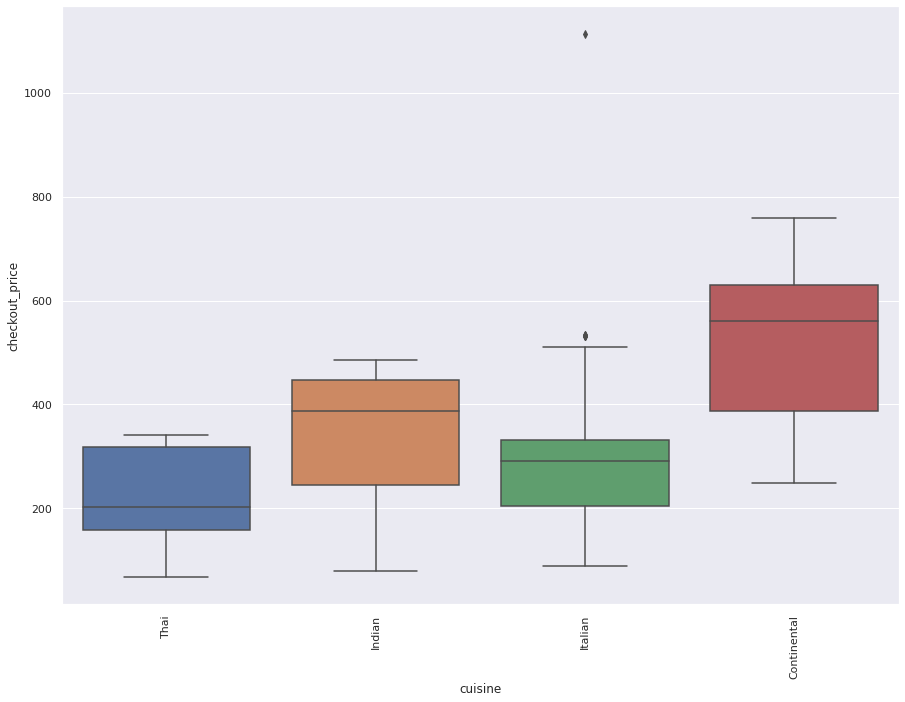

In [17]:
sns.set(rc = {"figure.figsize":(15,11)})
ax = sns.boxplot(data=df3, x = "cuisine", y = "checkout_price")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

- We could find Continental cuisine leans on the higher side of the prie range. 
- Most of the italian cuisine ranges from 200 to 400.
- Most of the Thai and Italian cuisine are in the same price range.

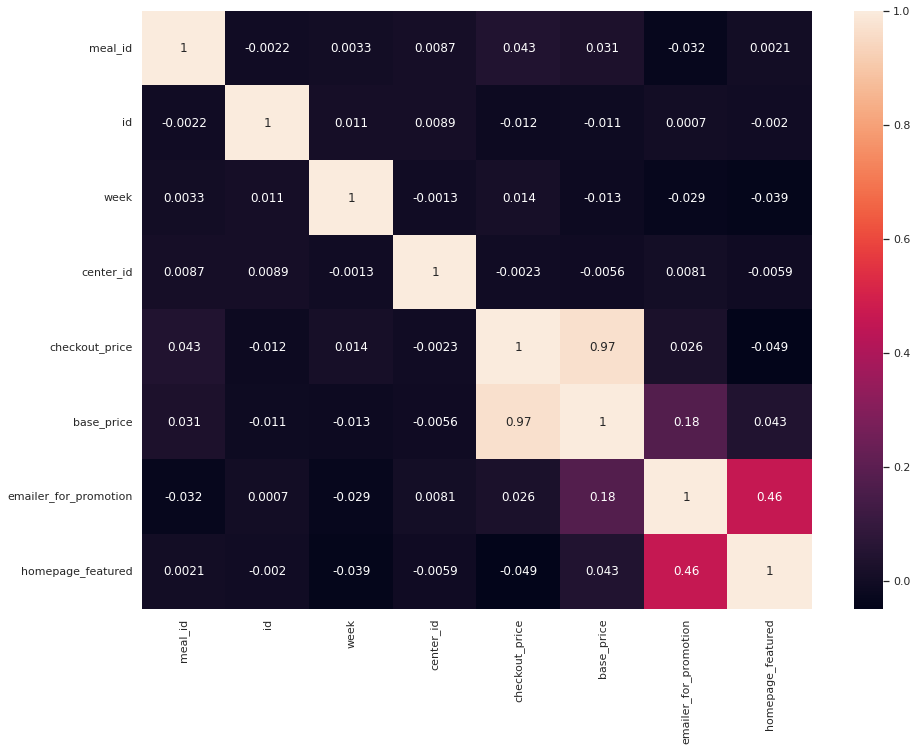

In [18]:
corr = df3.corr()
heat_map = sns.heatmap(corr, annot = True)

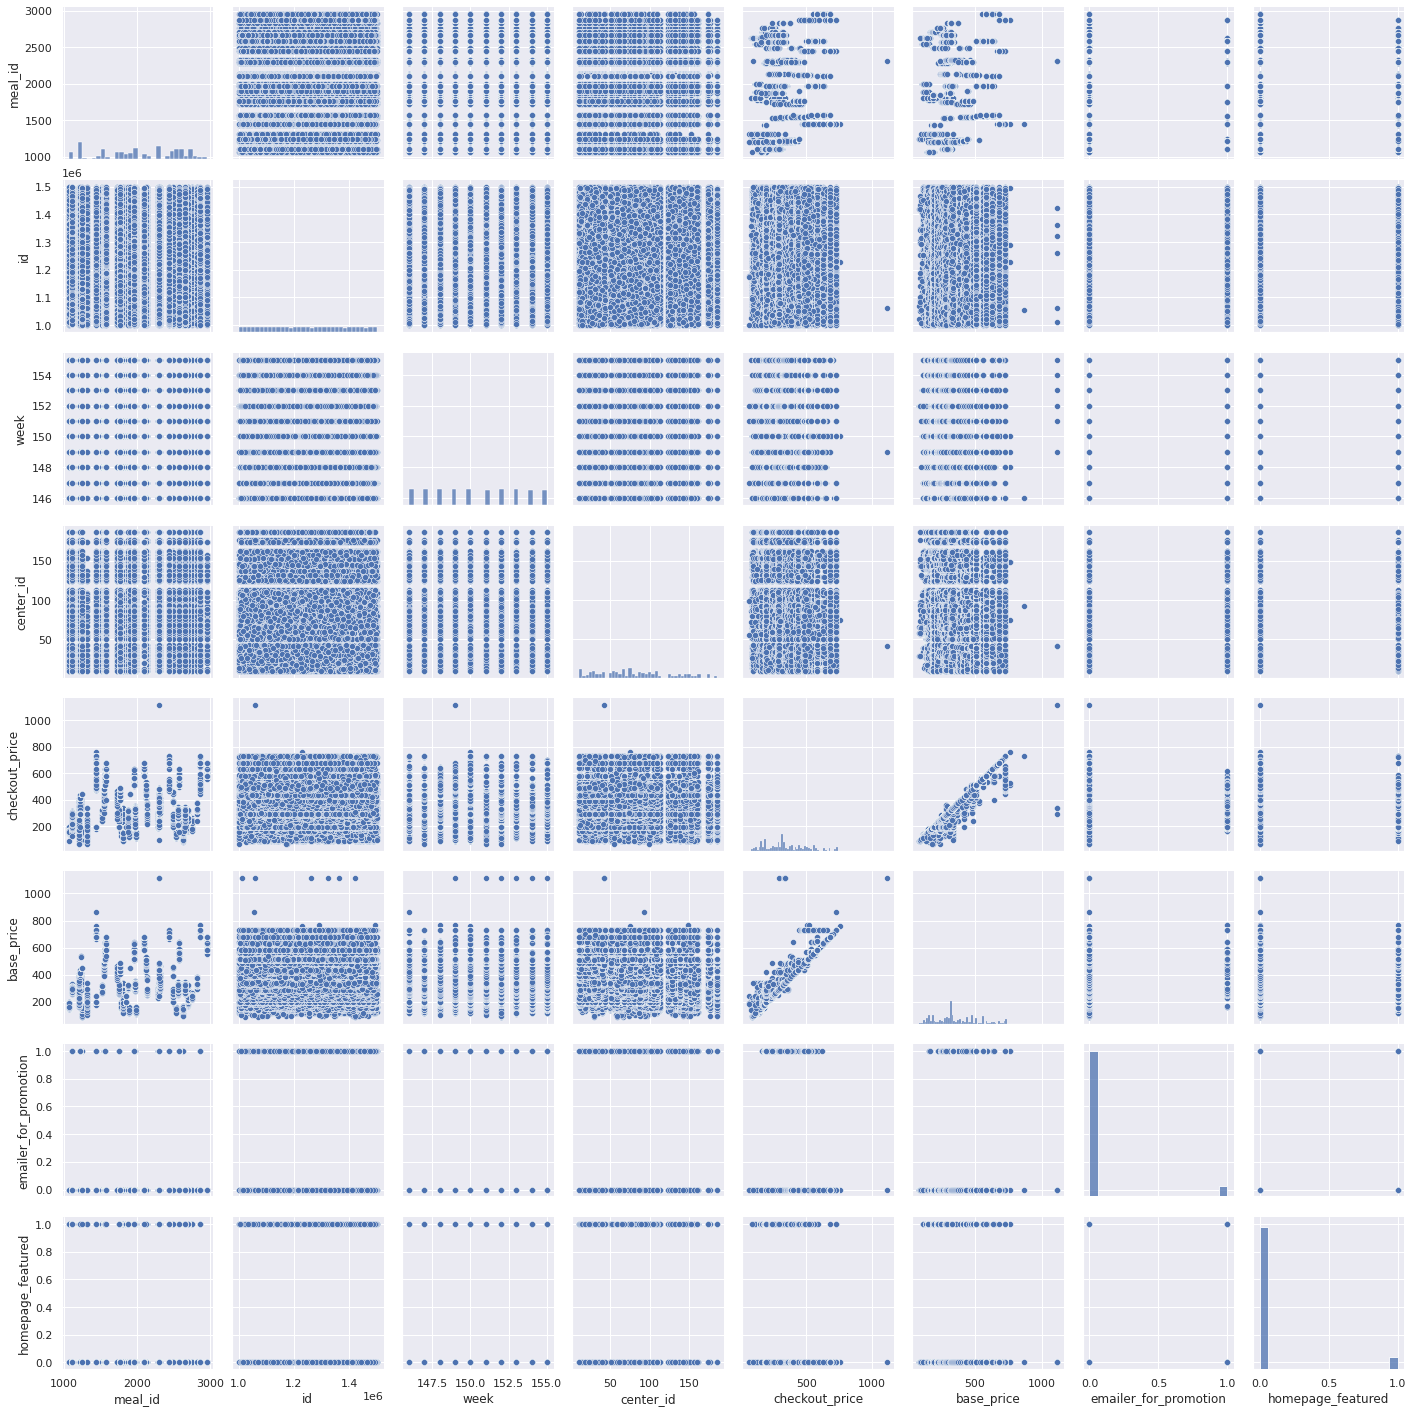

In [19]:
sns.pairplot(df3)